In [1]:
!pip install opencv-python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:3452: DecompressionBombWarning: Image size (121000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


✅ 이미지에서 총 451개의 개체(건물) 경계선을 찾았습니다.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

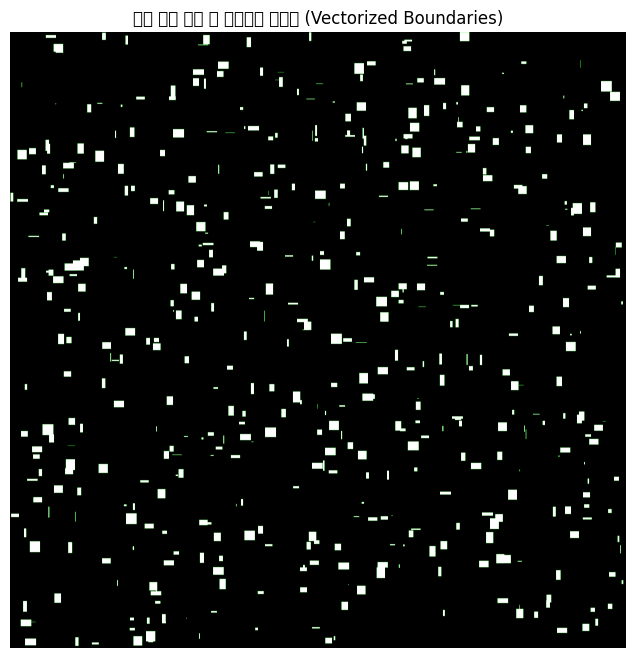


=== 추출된 벡터 데이터 요약 ===
개체 ID: 1
  면적: 4464.00
  근사된 벡터(꼭짓점) 개수: 4
  첫 번째 벡터 꼭짓점들: [[1460, 10901], [1460, 10937], [1584, 10937]]...
--------------------
개체 ID: 2
  면적: 23958.00
  근사된 벡터(꼭짓점) 개수: 4
--------------------
개체 ID: 3
  면적: 12120.00
  근사된 벡터(꼭짓점) 개수: 4
--------------------
개체 ID: 4
  면적: 8624.00
  근사된 벡터(꼭짓점) 개수: 4
--------------------
개체 ID: 5
  면적: 2160.00
  근사된 벡터(꼭짓점) 개수: 4
--------------------

총 451개의 개체에 대한 벡터 데이터가 'object_vectors' 리스트에 저장되었습니다.


In [2]:
#벡터화입니다. 구글드라이브에 png파일 넣어놓고 받아서 사용했는데 파일 경로만 바꿔서 쓰면 될 것 같아요.

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
# 1. Drive 마운트 확인 (필요하다면 이 코드를 가장 먼저 실행하세요)
drive.mount('/content/drive')
# --- 1. 이미지 로드 및 전처리 ---
# 업로드하신 파일명을 사용합니다.
FILE_NAME = '/content/drive/MyDrive/Colab Notebooks/download(1).png'

try:
    img_pil = Image.open(FILE_NAME).convert('L')
    img_np = np.array(img_pil)

    threshold_value = np.max(img_np) * 0.5
    binary_array = (img_np > threshold_value).astype(np.uint8)

    process_image = (binary_array * 255).astype(np.uint8)

except FileNotFoundError:
    print(f"오류: 파일 '{FILE_NAME}'을 찾을 수 없습니다. 파일을 업로드했는지 확인해주세요.")
    exit()
except Exception as e:
    print(f"이미지 처리 중 오류 발생: {e}")
    exit()
contours, hierarchy = cv2.findContours(
    process_image,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print(f"✅ 이미지에서 총 {len(contours)}개의 개체(건물) 경계선을 찾았습니다.")

object_vectors = []
for i, contour in enumerate(contours):
    approx_polygon = cv2.approxPolyDP(contour, epsilon, True)
    area = cv2.contourArea(contour)

    object_vectors.append({
        'id': i + 1,
        'area': area,
        'vector_points': approx_polygon.reshape(-1, 2).tolist(), # (x, y) 좌표 리스트로 변환
        'number_of_vectors': len(approx_polygon)
    })
visual_output = cv2.cvtColor(process_image, cv2.COLOR_GRAY2BGR)

cv2.drawContours(visual_output, contours, -1, (0, 255, 0), 2)


plt.figure(figsize=(8, 8))

plt.imshow(img_pil, cmap='gray')

plt.imshow(visual_output)
plt.title("건물 개체 식별 및 벡터화된 경계선 (Vectorized Boundaries)")
plt.axis('off')
plt.show()

print("\n=== 추출된 벡터 데이터 요약 ===")
for obj in object_vectors[:5]: # 최대 5개의 개체 정보만 출력
    print(f"개체 ID: {obj['id']}")
    print(f"  면적: {obj['area']:.2f}")
    print(f"  근사된 벡터(꼭짓점) 개수: {obj['number_of_vectors']}")
    if obj['id'] == 1:
         print(f"  첫 번째 벡터 꼭짓점들: {obj['vector_points'][:3]}...")
    print("-" * 20)

print(f"\n총 {len(object_vectors)}개의 개체에 대한 벡터 데이터가 'object_vectors' 리스트에 저장되었습니다.")